In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mplfinance as fplt
import math
from datetime import datetime

In [81]:
data = pd.read_csv('BTCUSDT_d.csv', usecols=['date', 'open', 'high', 'low', 'close'], index_col='date')
data = data.iloc[::-1]
data.index = pd.to_datetime(data.index, format="%Y-%m-%d %I:%M", infer_datetime_format=True) #Data_date must be in yyyy-mm-dd hh:mm format in csv

data['ma50'] = data['close'].rolling(window=50).mean()
data['ma200'] = data['close'].rolling(window=200).mean()
print(data)

                open      high       low     close        ma50        ma200
date                                                                       
2017-12-18  18860.04  19300.00  17029.98  18856.25         NaN          NaN
2017-12-19  18856.25  18950.00  16300.00  17295.20         NaN          NaN
2017-12-20  17295.20  17720.35  14777.66  16488.98         NaN          NaN
2017-12-21  16480.52  17309.50  14022.00  15492.64         NaN          NaN
2017-12-22  15514.03  15699.34  10961.00  13326.61         NaN          NaN
...              ...       ...       ...       ...         ...          ...
2021-08-07  42836.87  44700.00  42446.41  44572.54  35203.3140  44837.60520
2021-08-08  44572.54  45310.00  43261.00  43794.37  35369.5270  44879.23590
2021-08-09  43794.36  46454.15  42779.00  46253.40  35582.5918  44956.25225
2021-08-10  46248.87  46700.00  44589.46  45584.99  35862.1130  45019.45135
2021-08-11  45585.00  45800.00  45450.00  45762.63  36127.1744  45087.87450

[1333 rows 

C:\Users\Conan.O\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


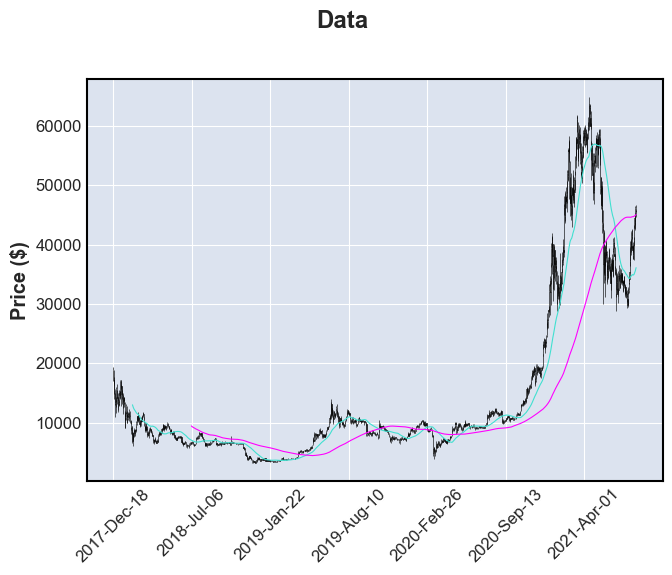

In [82]:
fplt.plot(
            data.iloc[:50000,:],
            type='candle',
            title='Data',
            ylabel='Price ($)',
            mav=[50,200]
        )
fplt.show()

In [153]:
#Initialize trade record
t_time = []
t_position = []
t_unitCost = []
t_commission = []
trade = [t_time, t_position, t_unitCost, t_commission]

#Initialize account balance
b_time = []
b_cash = []
b_hold = []
balance = [b_time, b_cash, b_hold]

b_time.append(data.iloc[0,:].name)
b_cash.append(50000)
b_hold.append(0)

#---------------Loop Algo------------------
numbering = np.arange(1,data.index.size) #1 cuz we want to skip first row later to test n-1 row

for number in numbering:
    
    position_need = 0
    
    b_time.append(data.iloc[number,:].name) #balance sheet time stamp
    
    if math.isnan(data.iloc[number-1, 4]) or math.isnan(data.iloc[number-1, 5]): #col 4 is 50ma, 5 is 200ma
        
        print(data.iloc[number,:].name,"   not started yet")
        
    elif (data.iloc[number-1, 4]<=data.iloc[number-1, 5]) and (data.iloc[number, 4] > data.iloc[number, 5]):
        
        print(data.iloc[number,:].name,"              crossing UP")
        
        position_need = 1-sum(t_position)
     
        t_time.append(data.iloc[number,:].name)
        t_position.append(position_need)
        t_unitCost.append(data.iloc[number,3])
        t_commission.append(0)
                
    elif (data.iloc[number-1, 4]>=data.iloc[number-1, 5]) and (data.iloc[number, 4] < data.iloc[number, 5]):
        
        print(data.iloc[number,:].name,"              crossing DOWN")
        
        position_need = -1-sum(t_position)
        
        t_time.append(data.iloc[number,:].name)
        t_position.append(position_need)
        t_unitCost.append(data.iloc[number,3])
        t_commission.append(0)
        
    else:
        
        print(data.iloc[number,:].name,"   no signal")
        
        
    b_cash.append(b_cash[-1]+data.iloc[number,3]*-position_need)
        
    b_hold.append(sum(t_position)*data.iloc[number,3])  # holding change everytime due to price change
        
print(sum(t_position))
        
if sum(t_position)!=0:
        
        position_need = 0-sum(t_position)
        
        t_time.append(data.iloc[-1,:].name)
        t_position.append(position_need)
        t_unitCost.append(data.iloc[-1,3])
        t_commission.append(0)
        
        b_time.append(data.iloc[-1,:].name)
        b_cash.append(b_cash[-1]+data.iloc[-1,3]*-position_need)
        b_hold.append(sum(t_position)*data.iloc[-1,3])
    

2017-12-19 00:00:00    not started yet
2017-12-20 00:00:00    not started yet
2017-12-21 00:00:00    not started yet
2017-12-22 00:00:00    not started yet
2017-12-23 00:00:00    not started yet
2017-12-24 00:00:00    not started yet
2017-12-25 00:00:00    not started yet
2017-12-26 00:00:00    not started yet
2017-12-27 00:00:00    not started yet
2017-12-28 00:00:00    not started yet
2017-12-29 00:00:00    not started yet
2017-12-30 00:00:00    not started yet
2017-12-31 00:00:00    not started yet
2018-01-01 00:00:00    not started yet
2018-01-02 00:00:00    not started yet
2018-01-03 00:00:00    not started yet
2018-01-04 00:00:00    not started yet
2018-01-05 00:00:00    not started yet
2018-01-06 00:00:00    not started yet
2018-01-07 00:00:00    not started yet
2018-01-08 00:00:00    not started yet
2018-01-09 00:00:00    not started yet
2018-01-10 00:00:00    not started yet
2018-01-11 00:00:00    not started yet
2018-01-12 00:00:00    not started yet
2018-01-13 00:00:00    no

2018-11-07 00:00:00    no signal
2018-11-08 00:00:00    no signal
2018-11-09 00:00:00    no signal
2018-11-10 00:00:00    no signal
2018-11-11 00:00:00    no signal
2018-11-12 00:00:00    no signal
2018-11-13 00:00:00    no signal
2018-11-14 00:00:00    no signal
2018-11-15 00:00:00    no signal
2018-11-16 00:00:00    no signal
2018-11-17 00:00:00    no signal
2018-11-18 00:00:00    no signal
2018-11-19 00:00:00    no signal
2018-11-20 00:00:00    no signal
2018-11-21 00:00:00    no signal
2018-11-22 00:00:00    no signal
2018-11-23 00:00:00    no signal
2018-11-24 00:00:00    no signal
2018-11-25 00:00:00    no signal
2018-11-26 00:00:00    no signal
2018-11-27 00:00:00    no signal
2018-11-28 00:00:00    no signal
2018-11-29 00:00:00    no signal
2018-11-30 00:00:00    no signal
2018-12-01 00:00:00    no signal
2018-12-02 00:00:00    no signal
2018-12-03 00:00:00    no signal
2018-12-04 00:00:00    no signal
2018-12-05 00:00:00    no signal
2018-12-06 00:00:00    no signal
2018-12-07

2019-07-26 00:00:00    no signal
2019-07-27 00:00:00    no signal
2019-07-28 00:00:00    no signal
2019-07-29 00:00:00    no signal
2019-07-30 00:00:00    no signal
2019-07-31 00:00:00    no signal
2019-08-01 00:00:00    no signal
2019-08-02 00:00:00    no signal
2019-08-03 00:00:00    no signal
2019-08-04 00:00:00    no signal
2019-08-05 00:00:00    no signal
2019-08-06 00:00:00    no signal
2019-08-07 00:00:00    no signal
2019-08-08 00:00:00    no signal
2019-08-09 00:00:00    no signal
2019-08-10 00:00:00    no signal
2019-08-11 00:00:00    no signal
2019-08-12 00:00:00    no signal
2019-08-13 00:00:00    no signal
2019-08-14 00:00:00    no signal
2019-08-15 00:00:00    no signal
2019-08-16 00:00:00    no signal
2019-08-17 00:00:00    no signal
2019-08-18 00:00:00    no signal
2019-08-19 00:00:00    no signal
2019-08-20 00:00:00    no signal
2019-08-21 00:00:00    no signal
2019-08-22 00:00:00    no signal
2019-08-23 00:00:00    no signal
2019-08-24 00:00:00    no signal
2019-08-25

2020-05-11 00:00:00    no signal
2020-05-12 00:00:00    no signal
2020-05-13 00:00:00    no signal
2020-05-14 00:00:00    no signal
2020-05-15 00:00:00    no signal
2020-05-16 00:00:00    no signal
2020-05-17 00:00:00    no signal
2020-05-18 00:00:00    no signal
2020-05-19 00:00:00    no signal
2020-05-20 00:00:00    no signal
2020-05-21 00:00:00               crossing UP
2020-05-22 00:00:00    no signal
2020-05-23 00:00:00    no signal
2020-05-24 00:00:00    no signal
2020-05-25 00:00:00    no signal
2020-05-26 00:00:00    no signal
2020-05-27 00:00:00    no signal
2020-05-28 00:00:00    no signal
2020-05-29 00:00:00    no signal
2020-05-30 00:00:00    no signal
2020-05-31 00:00:00    no signal
2020-06-01 00:00:00    no signal
2020-06-02 00:00:00    no signal
2020-06-03 00:00:00    no signal
2020-06-04 00:00:00    no signal
2020-06-05 00:00:00    no signal
2020-06-06 00:00:00    no signal
2020-06-07 00:00:00    no signal
2020-06-08 00:00:00    no signal
2020-06-09 00:00:00    no sign

2021-04-24 00:00:00    no signal
2021-04-25 00:00:00    no signal
2021-04-26 00:00:00    no signal
2021-04-27 00:00:00    no signal
2021-04-28 00:00:00    no signal
2021-04-29 00:00:00    no signal
2021-04-30 00:00:00    no signal
2021-05-01 00:00:00    no signal
2021-05-02 00:00:00    no signal
2021-05-03 00:00:00    no signal
2021-05-04 00:00:00    no signal
2021-05-05 00:00:00    no signal
2021-05-06 00:00:00    no signal
2021-05-07 00:00:00    no signal
2021-05-08 00:00:00    no signal
2021-05-09 00:00:00    no signal
2021-05-10 00:00:00    no signal
2021-05-11 00:00:00    no signal
2021-05-12 00:00:00    no signal
2021-05-13 00:00:00    no signal
2021-05-14 00:00:00    no signal
2021-05-15 00:00:00    no signal
2021-05-16 00:00:00    no signal
2021-05-17 00:00:00    no signal
2021-05-18 00:00:00    no signal
2021-05-19 00:00:00    no signal
2021-05-20 00:00:00    no signal
2021-05-21 00:00:00    no signal
2021-05-22 00:00:00    no signal
2021-05-23 00:00:00    no signal
2021-05-24

In [149]:
trade = pd.DataFrame(
            {
                 'time':t_time, 
                 'position':t_position, 
                 'unit cost':t_unitCost, 
                 'commission':t_commission
            }   
        )
print(trade)

        time  position  unit cost  commission
0 2019-04-24         1    5415.00           0
1 2019-10-26        -2    9230.00           0
2 2020-02-18         2   10164.71           0
3 2020-03-25        -2    6677.43           0
4 2020-05-21         2    9068.65           0
5 2021-06-19        -2   35483.72           0
6 2021-08-11         1   45762.63           0


In [150]:
balance = pd.DataFrame(
            {
                'time':b_time,
                'cash':b_cash, 
                'holding':b_hold, 
                'asset':np.add(b_cash, b_hold) 
            }   
        )
print(balance)

           time       cash   holding     asset
0    2017-12-18   50000.00      0.00  50000.00
1    2017-12-19   50000.00      0.00  50000.00
2    2017-12-20   50000.00      0.00  50000.00
3    2017-12-21   50000.00      0.00  50000.00
4    2017-12-22   50000.00      0.00  50000.00
...         ...        ...       ...       ...
1329 2021-08-08  108900.58 -43794.37  65106.21
1330 2021-08-09  108900.58 -46253.40  62647.18
1331 2021-08-10  108900.58 -45584.99  63315.59
1332 2021-08-11  108900.58 -45762.63  63137.95
1333 2021-08-11   63137.95      0.00  63137.95

[1334 rows x 4 columns]


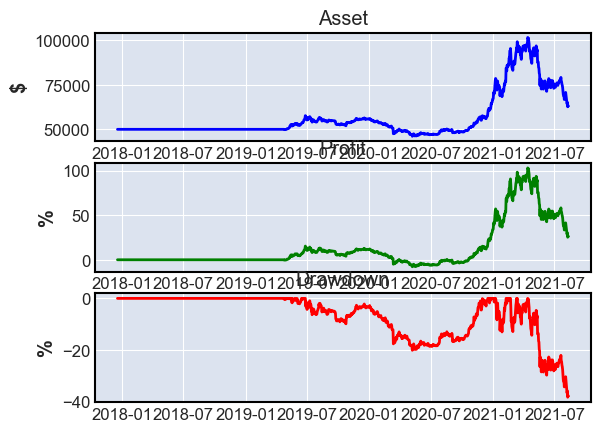

In [151]:
previous_peaks = balance['asset'].cummax()
#print(previous_peaks)
drawdown = (balance['asset']-previous_peaks)/previous_peaks*100
#print(drawdown)
profit = (balance['asset']-balance['asset'].iloc[0])/balance['asset'].iloc[0]*100
#print(profit)
fig, axs = plt.subplots(3)
axs[0].plot(balance['time'], balance['asset'], color="b")
axs[0].title.set_text('Asset')
axs[0].set_ylabel('$')
axs[1].plot(balance['time'], profit, color="g")
axs[1].title.set_text('Profit')
axs[1].set_ylabel('%')
axs[2].plot(balance['time'], drawdown, color="r")
axs[2].title.set_text('Drawdown')
axs[2].set_ylabel('%')
plt.show()